<a href="https://colab.research.google.com/github/keychi25/JapaneseCharacter/blob/master/%E3%81%B2%E3%82%89%E3%81%8C%E3%81%AA%E5%88%A4%E5%88%A5%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=576, epochs=400)`


Epoch 1/400
576/576 [==============================] - 8s 14ms/step - loss: 3.5770 - accuracy: 0.1349 - val_loss: 1.5226 - val_accuracy: 0.6263
Epoch 2/400
576/576 [==============================] - 8s 13ms/step - loss: 1.8008 - accuracy: 0.4905 - val_loss: 0.5785 - val_accuracy: 0.8203
Epoch 3/400
576/576 [==============================] - 7s 13ms/step - loss: 1.1198 - accuracy: 0.6612 - val_loss: 0.3020 - val_accuracy: 0.8980
Epoch 4/400
576/576 [==============================] - 8s 13ms/step - loss: 0.8156 - accuracy: 0.7415 - val_loss: 0.2340 - val_accuracy: 0.9280
Epoch 5/400
576/576 [==============================] - 7s 13ms/step - loss: 0.6574 - accuracy: 0.7888 - val_loss: 0.1538 - val_accuracy: 0.9484
Epoch 6/400
576/576 [==============================] - 8s 13ms/step - loss: 0.5509 - accuracy: 0.8279 - val_loss: 0.1043 - val_accuracy: 0.9696
Epoch 7/400
576/576 [==============================] - 7s 13ms/step - loss: 0.4919 - accuracy: 0.8446 - val_loss: 0.1074 - val_accuracy:

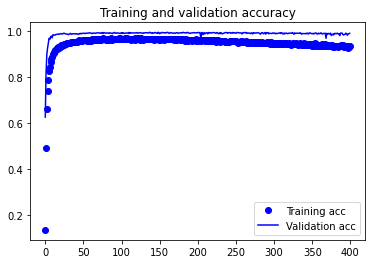

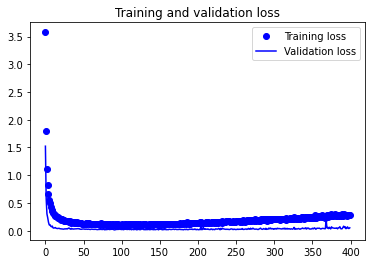

In [0]:
import numpy as np
from PIL import Image
import scipy.misc
from keras import backend as K
from tensorflow.keras import initializers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

import pprint
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

nb_classes = 72
# input image dimensions
img_rows, img_cols = 32, 32
# img_rows, img_cols = 127, 128

ary = np.load("hiragana.npz")['arr_0'].reshape(
    [-1, 127, 128]).astype(np.float32)
X_train = np.zeros([nb_classes * 160, img_rows, img_cols], dtype=np.float32)
for i in range(nb_classes * 160):
    X_train[i] = np.array(Image.fromarray(ary[i]).resize((img_rows, img_cols)))
y_train = np.repeat(np.arange(nb_classes), 160)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
datagen = ImageDataGenerator(rotation_range=15, zoom_range=0.20)
datagen.fit(X_train)

model = Sequential()

def create_model():
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

create_model()
model.summary()

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=16), samples_per_epoch=X_train.shape[0],
                   nb_epoch=400, validation_data=(X_test, y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('精度を示すグラフのファイル名')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('損失値を示すグラフのファイル名')

# モデルを保存する
filename = 'model_V3.sav'
pickle.dump(model, open(filename, 'wb'))

# 保存したモデルをロードする
# loaded_model = pickle.load(open(filename, 'rb'))
score = model.evaluate(X_test, y_test, batch_size=32)
pprint.pprint(score)